<a href="https://colab.research.google.com/github/dandamudi-geeta/Advance-Data-Analytics/blob/main/2348512_Image_Segmentation(ADA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [6]:
q1 = "/content/ADA1.png"
q2 = "/content/ADA2.jpeg"

In [7]:
img1 = cv2.imread(q1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(q2, cv2.IMREAD_GRAYSCALE)

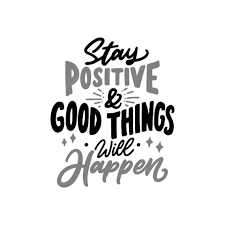

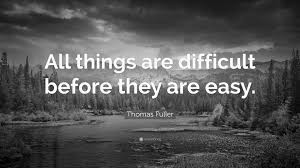

In [9]:
cv2_imshow(img1)
cv2_imshow(img2)

**Simple threshold**

In [10]:
import numpy as np

ret, thresh1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img1, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img1, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY_INV)

In [11]:
titles = ['Original', 'Binary', 'Binary_Inv', 'Trunc', 'ToZero', 'ToZero_Inv']
images = [img1, thresh1, thresh2, thresh3, thresh4, thresh5]

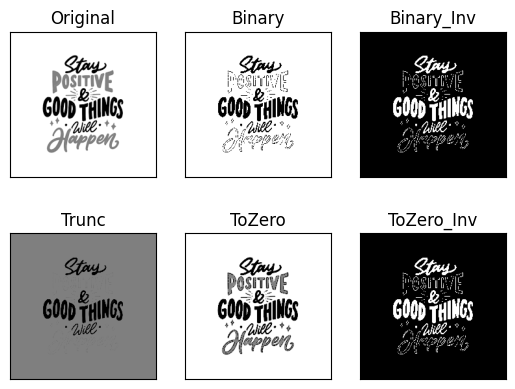

In [15]:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

**Adaptive Thresholding**


In [16]:
m_img2 = cv2.medianBlur(img2,5)

In [18]:
ret, th1 = cv2.threshold(m_img2,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(m_img2,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(m_img2,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                            cv2.THRESH_BINARY,11,2)

In [19]:
titles = ['Original', 'Gloabl Thresholding (v=127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [m_img2, th1, th2, th3]

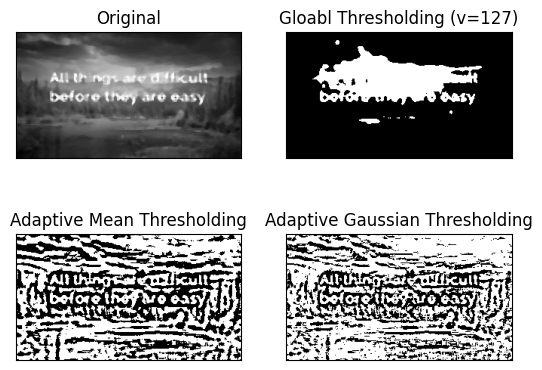

In [20]:
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

**Otsu's Binarization**

In [26]:
#global thresholding
ret1,th1 = cv2.threshold(img2,127,255,cv2.THRESH_BINARY)

In [27]:

#otsu's thresholding
ret2,th2 = cv2.threshold(img2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [28]:
#otsu's thresholding after gaussian filtering
blur = cv2.GaussianBlur(img2,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [29]:
images = [img2, 0, th1,
          img2, 0, th2,
          blur, 0, th3]
titles = ['Original Image', 'Histogram', 'Global Thresholding (v=127)',
          'Original Image', 'Histogram', "Otsu's Thresholding",
          'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]

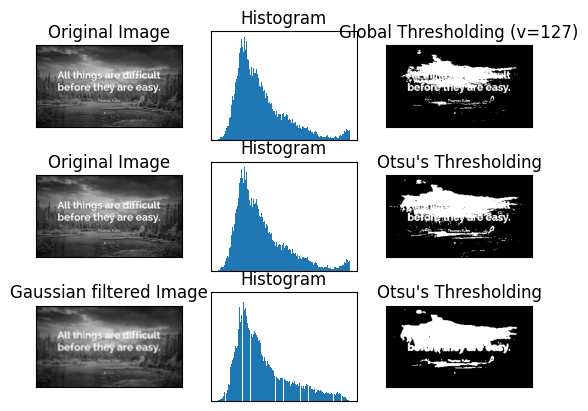

In [30]:
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

**WaterShed Algorithm**

In [31]:
img3 = cv2.imread("/content/ADA5.jpg")

(-0.5, 251.5, 311.5, -0.5)

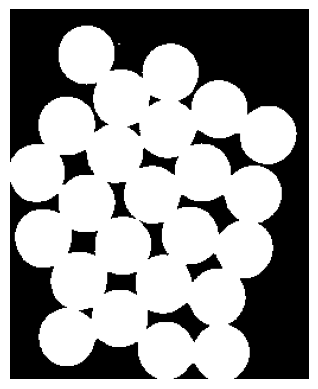

In [32]:
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh,'gray')
plt.axis("off")

In [33]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

In [34]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

In [35]:

# finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

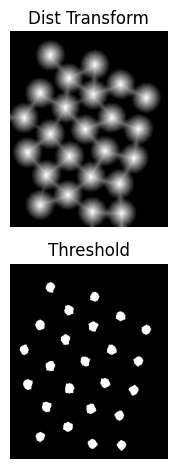

In [36]:
plt.subplot(2,1,1)
plt.imshow(dist_transform,'gray')
plt.title("Dist Transform")
plt.axis("off")

plt.subplot(2,1,2)
plt.title("Threshold")
plt.imshow(sure_fg,'gray')
plt.axis("off")

plt.tight_layout()
plt.show()

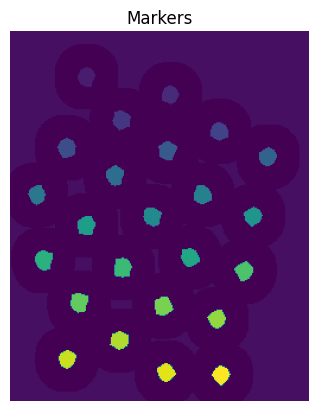

In [37]:
# marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# add one to all labels so that sure background is not 0, but 1
markers = markers+1

# now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers)
plt.axis("off")
plt.title("Markers")
plt.show()

(-0.5, 251.5, 311.5, -0.5)

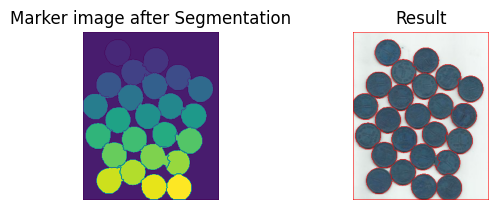

In [38]:
markers = cv2.watershed(img3,markers)
img3[markers== -1] = [255,0,0]

plt.subplot(2,2,1)
plt.imshow(markers)
plt.title("Marker image after Segmentation")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(img3)
plt.title("Result")
plt.axis("off")

In [42]:
img3 = cv2.imread("/content/ADA3.jpeg")

(-0.5, 265.5, 189.5, -0.5)

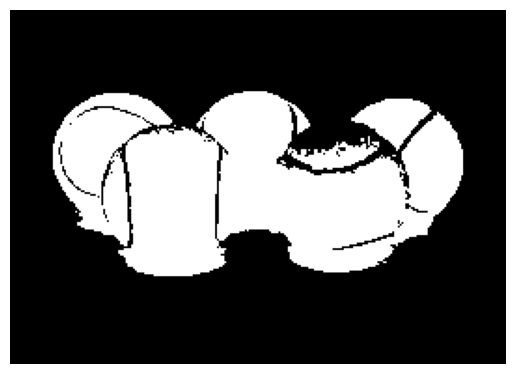

In [43]:
gray = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh,'gray')
plt.axis("off")

In [44]:
img4 = cv2.imread("/content/ADA4.jpeg")

(-0.5, 299.5, 167.5, -0.5)

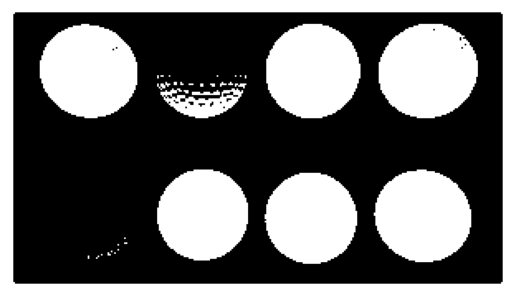

In [45]:
gray = cv2.cvtColor(img4, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.imshow(thresh,'gray')
plt.axis("off")